## Dark matter effects in GW


In [167]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const

### Gravitational wave frequency 

To first order in the inspiral of low velocity/compactness, we may approximate the gravitational wave frequency as 

### $ f_{GW} = 2 f_{orb} $

With $f_{orb}$ being the orbital frequency. To first order in Keplerian orbits, we may acquire the orbital frequency form Kepler's Law:

### $f_{orb} = \frac{1}{2 \pi} \sqrt{\frac{G ( M_{BH} + m_1) }{a^3}} \to f_{GW} = \frac{1}{\pi} \sqrt{\frac{G M_{BH} ( 1 + q) }{a^3}}, \quad q = \frac{m_1}{M_{BH}}$

Which can be casted into an easier-to-read form given by:

## $f_{GW} = 6.77 \cdot 10^{-16}\cdot ( 1+ q)^{1/2} \cdot  \Big(\frac{M_{bh}}{M_{\odot}}\Big )^{1/2} \cdot \Big(\frac{a}{1 pc}\Big)^{-3/2} \: \text{[Hz]}$ 

In [168]:
(const.G * const.M_sun / const.pc**3 )**0.5 * 1/np.pi

<Quantity 6.765192e-16 1 / s>

similary, we can get a relationship for the semimajor axis (radius for circular orbits) that takes the form

## $a = 7.71 \cdot 10^{-11}\cdot ( 1+ q)^{1/3} \cdot  \Big(\frac{M_{bh}}{M_{\odot}}\Big )^{1/3} \cdot \Big(\frac{f_{GW}}{ \text{ Hz}}\Big)^{-2/3} \: \text{[pc]}$ 

### Dark Matter spike and scale radius

Following the adiabatic growth of the black hole to develop a spiked overdensity of the halo, one can follow the density profile prescribed as:

### $\begin{equation}
\rho_{\mathrm{spike}}(r)= 
\begin{cases}0 & \text { for } r \leqslant 2 R_s \\ 
\rho_{sp}\left(\frac{r}{r_{\mathrm{sp}}}\right)^{-\gamma} & \text { for } 2 R_s<r \leqslant r_{\mathrm{sp}}, 
\\ \rho_{\text{NFW}}(r) & \text { for } r>r_{\mathrm{sp}}\end{cases}
\end{equation}$

From which the spike radius can be given as

## $r_{sp} \approx \Big[ \frac{(3-\gamma)(0.2)^{3-\gamma}M_{BH}}{2 \pi \rho_{sp}} \Big]^{1/3} $



## $r_{sp} = 
1.08 \cdot 10^{-1} \cdot \big[ (3-\gamma)^{1/3} (0.2)^{-\gamma/3}\big] \cdot \Big( \frac{M_{BH}}{M_{\odot}}\Big)^{1/3} \cdot \Big( \frac{\rho_{sp}}{M_{\odot} \text{/ pc}^3}\Big)^{-1/3} \text{[pc]}$



## $r_{sp} = 
3.23 \cdot 10^{-2} \cdot \big[ (3-\gamma)^{1/3} (0.2)^{-\gamma/3}\big] \cdot \Big( \frac{M_{BH}}{M_{\odot}}\Big)^{1/3} \cdot \Big( \frac{\rho_{sp}}{\text{GeV / cm}^3}\Big)^{-1/3} \text{[pc]}$

In [169]:
0.2 / (2*np.pi)**(1/3)

0.1083852140278578

In [170]:
gev2kg = 1.79e-27 * u.kg
cm2m = 0.01 * u.m
0.2 / (2*np.pi)**(1/3) * (const.M_sun / gev2kg * cm2m**3 / (const.pc)**3)**(-1/3)

<Quantity 0.0322926>

Now, we need $a < r_{sp}$ as well as $f_{GW} \approx [10^{-3},10^{-1}]$ Hz. So lets try a central frequency of $10^{-2}$ Hz to make our radii work

In [171]:
#calculate rsp given Mbh in solar masses, rho_sp in solar masses/pc^3 and spike coefficient gamma
def rsp(M, rho, gamma):
    return 1.08e-1 * (  (3-gamma)**(1/3) * (0.2)**(-gamma/3) ) * M**(1/3) * (rho) **(-1/3)


In [172]:
#calculate the gw frequency given mass ratio q, black hole mass M in solar masses, and radius a in pc
def fgw(q, M, a):
    return 6.77e-16 * (1+q)**0.5 * M**0.5 * a**(-3/2)

In [173]:
#calculate radius, given q, M and freqeuncy f
def agw(q, M, f):
    return 7.71e-11 * (1+q)**(1/3) * M**(1/3) * f**(-2/3)

In [174]:
#GW side
q = 1e-3  #mass ratio
M = 1e3  #in solar masses
f = 1e-2  #desired frequency in Hz

#DM side
gamma = 7/3  #spike coefficient
rho = 226 #in solar mass /pc^3

agw(q, M ,f)

1.661622651269148e-08

In [175]:
rsp(M, rho, 7/3)

0.5415857050525719

### Working at  $M_{BH} = 10^3 \: M_{\odot}$, 

Text(0, 0.5, 'Radius $r$ needed (pc)')

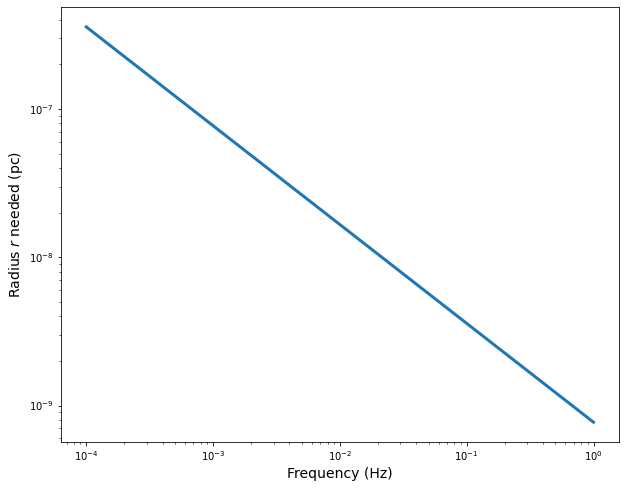

In [176]:
#GW side
q = 1e-3  #mass ratio
M = 1e3  #in solar masses
f = 1e-2  #desired frequency in Hz

#DM side
gamma = 7/3  #spike coefficient
rho = 226 #in solar mass /pc^3


f  = np.linspace(1e-4,1,1000) #in Hz
a = agw(q,M,f)

plt.figure(figsize=(10,8))
plt.loglog(f,a, lw=3)
plt.xlabel("Frequency (Hz)", fontsize=14); plt.ylabel("Radius $r$ needed (pc)", fontsize=14)

/tmp/ipykernel_3939/781212477.py:3: RuntimeWarning: invalid value encountered in power
  return 1.08e-1 * (  (3-gamma)**(1/3) * (0.2)**(-gamma/3) ) * M**(1/3) * (rho) **(-1/3)


Text(0, 0.5, 'Radius $r_{sp}$ (pc)')

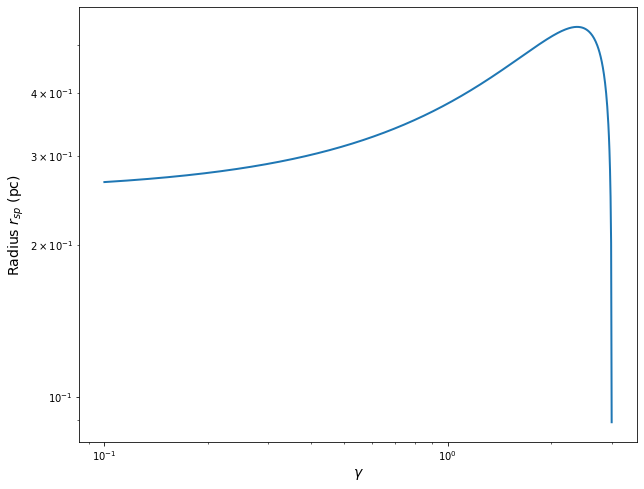

In [177]:
gamma = np.geomspace(0.1,4,1000)
plt.figure(figsize=(10,8))
plt.loglog(gamma, rsp(M, rho, gamma), lw=2)
plt.xlabel("$\\gamma$ ", fontsize=14); plt.ylabel("Radius $r_{sp}$ (pc)", fontsize=14)

Text(0, 0.5, 'Radius $r_{sp}$ (pc)')

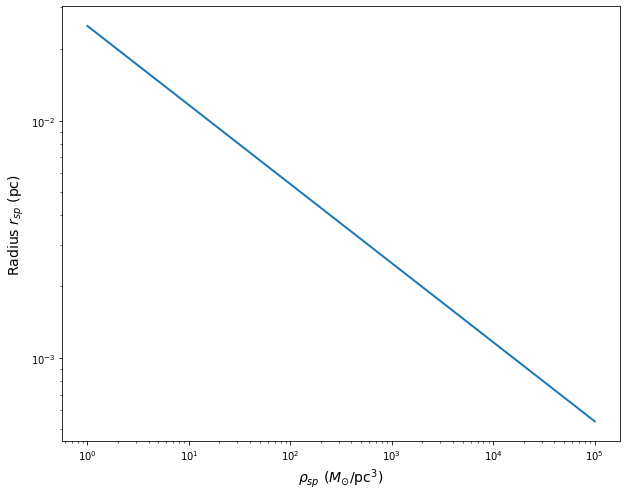

In [178]:
rho = np.geomspace(1e0, 1e5) # in solar masses / pc^3
plt.figure(figsize=(10,8))
plt.loglog(rho, rsp(M, rho, 2.9999999), lw = 2)
plt.xlabel("$\\rho_{sp}$ ($M_{\odot}$/pc$^3$)", fontsize=14); plt.ylabel("Radius $r_{sp}$ (pc)", fontsize=14)

### Working at  $M_{BH} = 10^4 \: M_{\odot}$, 

Text(0, 0.5, 'Radius $r$ needed (pc)')

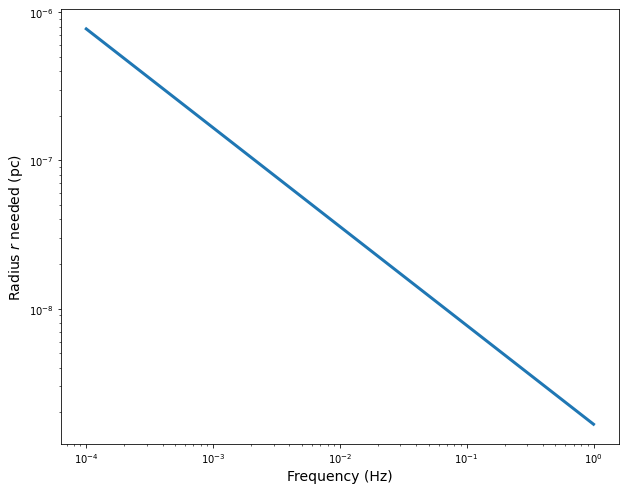

In [179]:
#GW side
q = 1e-3  #mass ratio
M = 1e4  #in solar masses
f = 1e-2  #desired frequency in Hz

#DM side
gamma = 7/3  #spike coefficient
rho = 226 #in solar mass /pc^3


f  = np.linspace(1e-4,1,1000) #in Hz
a = agw(q,M,f)

plt.figure(figsize=(10,8))
plt.loglog(f,a, lw=3)
plt.xlabel("Frequency (Hz)", fontsize=14); plt.ylabel("Radius $r$ needed (pc)", fontsize=14)

Text(0, 0.5, 'Radius $r_{sp}$ (pc)')

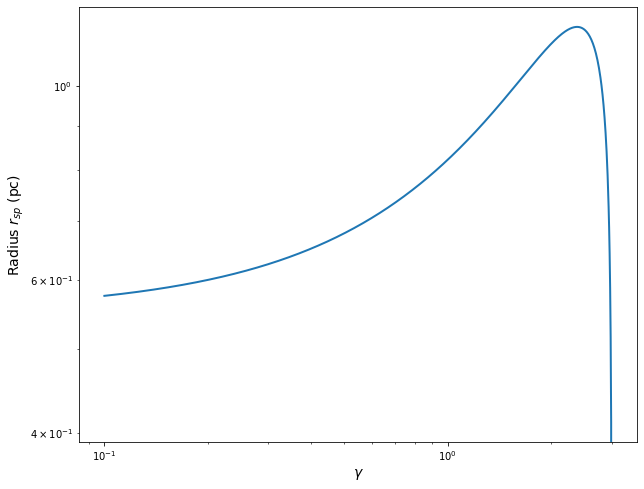

In [180]:
gamma = np.geomspace(0.1,3,1000)
plt.figure(figsize=(10,8))
plt.loglog(gamma, rsp(M, rho, gamma), lw=2)
plt.xlabel("$\\gamma$ ", fontsize=14); plt.ylabel("Radius $r_{sp}$ (pc)", fontsize=14)

Text(0, 0.5, 'Radius $r_{sp}$ (pc)')

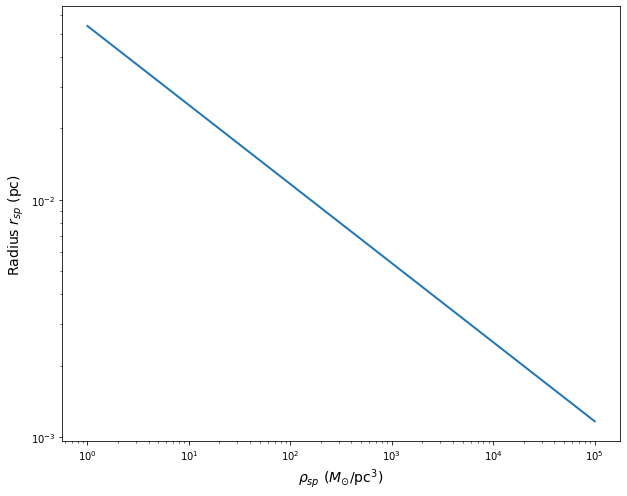

In [181]:
rho = np.geomspace(1e0, 1e5) # in solar masses / pc^3
plt.figure(figsize=(10,8))
plt.loglog(rho, rsp(M, rho, 2.9999999), lw = 2)
plt.xlabel("$\\rho_{sp}$ ($M_{\odot}$/pc$^3$)", fontsize=14); plt.ylabel("Radius $r_{sp}$ (pc)", fontsize=14)